In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import time
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_dev = x_train[-10000:]
y_dev = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# one-hot format
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_dev = np_utils.to_categorical(y_dev, 10)

x_train = x_train / 255.0
x_dev = x_dev / 255.0
x_test = x_test / 255.0

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3374 - accuracy: 0.9267 - val_loss: 0.2128 - val_accuracy: 0.9623
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1743 - accuracy: 0.9722 - val_loss: 0.1634 - val_accuracy: 0.9739
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1361 - accuracy: 0.9810 - val_loss: 0.1495 - val_accuracy: 0.9751
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1161 - accuracy: 0.9850 - val_loss: 0.1451 - val_accuracy: 0.9768
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1027 - accuracy: 0.9882 - val_loss: 0.1367 - val_accuracy: 0.9779
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0940 - accuracy: 0.9896 - val_loss: 0.1348 - val_accuracy: 0.9778
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0856 - accuracy: 0.9911 - val_loss: 0.1381 - val_accuracy: 0.9759
Epoch 

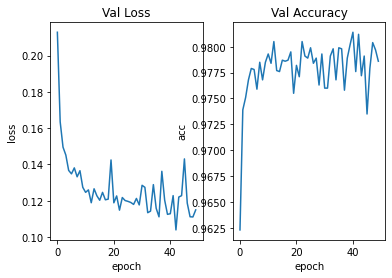

313/313 [==============================] - 0s 963us/step - loss: 0.1034 - accuracy: 0.9799
test loss: 0.10338908433914185
test accuracy: 0.9799000024795532


In [2]:
# 1
# L2 regularization, Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.2751 - accuracy: 0.9179 - val_loss: 0.1145 - val_accuracy: 0.9658
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.1087 - accuracy: 0.9668 - val_loss: 0.0811 - val_accuracy: 0.9757
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0746 - accuracy: 0.9763 - val_loss: 0.0812 - val_accuracy: 0.9767
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0470 - accuracy: 0.9843 - val_loss: 0.0841 - val_accuracy: 0.9757
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0404 - accuracy: 0.9864 - val_loss: 0.0804 - val_accuracy: 0.9769
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.0795 - val_accuracy: 0.9779
Epoch 

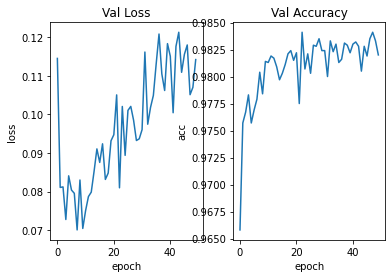

313/313 [==============================] - 0s 639us/step - loss: 0.1105 - accuracy: 0.9832
test loss: 0.11053644120693207
test accuracy: 0.9832000136375427


In [3]:
# 2
# Dropout regularization(0.2), Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
378/391 [============================>.] - ETA: 0s - loss: 0.2435 - accuracy: 0.9282
Epoch 1: val_loss improved from inf to 0.11019, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.2397 - accuracy: 0.9294 - val_loss: 0.1102 - val_accuracy: 0.9682
Epoch 2/50
382/391 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9740
Epoch 2: val_loss improved from 0.11019 to 0.08487, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.0853 - accuracy: 0.9741 - val_loss: 0.0849 - val_accuracy: 0.9753
Epoch 3/50
384/391 [============================>.] - ETA: 0s - loss: 0.0525 - accuracy: 0.9843
Epoch 3: val_loss improved from 0.08487 to 0.08208, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.0821 - val_accuracy: 0.9758
Epoch 4/50
383/391 [============================>.] - ETA: 0s - loss: 0.0371 

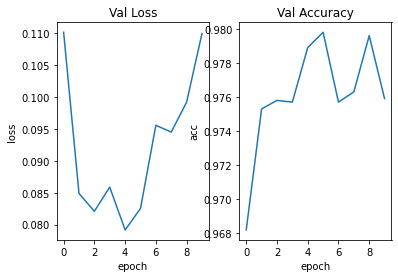

313/313 [==============================] - 0s 633us/step - loss: 0.0707 - accuracy: 0.9802
best test model loss:  0.07066577672958374
best test model accuracy:  0.9801999926567078


In [4]:
# 3
# Early stopping(patience=5), adam optimizer

batchSize = 128
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 0.2832 - accuracy: 0.9437 - val_loss: 0.2083 - val_accuracy: 0.9635
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1676 - accuracy: 0.9760 - val_loss: 0.1895 - val_accuracy: 0.9697
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1420 - accuracy: 0.9819 - val_loss: 0.1841 - val_accuracy: 0.9710
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1264 - accuracy: 0.9857 - val_loss: 0.1682 - val_accuracy: 0.9751
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1169 - accuracy: 0.9876 - val_loss: 0.1704 - val_accuracy: 0.9745
Epoch 6/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1097 - accuracy: 0.9885 - val_loss: 0.1653 - val_accuracy: 0.9747
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1099 - accuracy: 0.9874 - val_loss: 0.1657 - val_accuracy: 0.9751
Epoch 

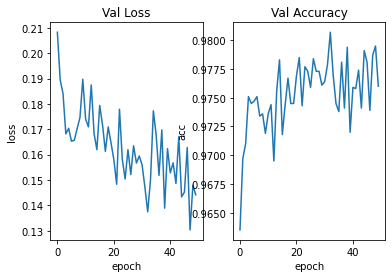

313/313 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.9779
test loss: 0.1339709758758545
test accuracy: 0.9779000282287598


In [5]:
# 4
# L2 regularization, batch norm, adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 0.3886 - accuracy: 0.9145 - val_loss: 0.2198 - val_accuracy: 0.9616
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1926 - accuracy: 0.9676 - val_loss: 0.1732 - val_accuracy: 0.9737
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1478 - accuracy: 0.9792 - val_loss: 0.1676 - val_accuracy: 0.9723
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1250 - accuracy: 0.9842 - val_loss: 0.1636 - val_accuracy: 0.9730
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1090 - accuracy: 0.9879 - val_loss: 0.1440 - val_accuracy: 0.9766
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0966 - accuracy: 0.9906 - val_loss: 0.1303 - val_accuracy: 0.9789
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0845 - accuracy: 0.9928 - val_loss: 0.1278 - val_accuracy: 0.9797
Epoch 

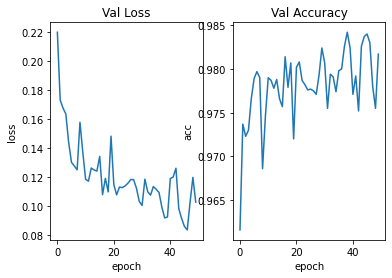

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9813
test loss: 0.09661881625652313
test accuracy: 0.9812999963760376


In [6]:
# 5
# L2 regularization, Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 0.3327 - accuracy: 0.9019 - val_loss: 0.1294 - val_accuracy: 0.9629
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1225 - accuracy: 0.9633 - val_loss: 0.1028 - val_accuracy: 0.9694
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.0834 - val_accuracy: 0.9738
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0812 - val_accuracy: 0.9757
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0710 - val_accuracy: 0.9796
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0722 - val_accuracy: 0.9792
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0706 - val_accuracy: 0.9794
Epoch 

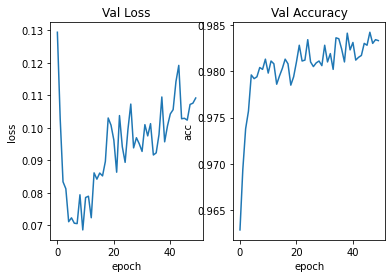

313/313 [==============================] - 0s 710us/step - loss: 0.0956 - accuracy: 0.9829
test loss: 0.09560000896453857
test accuracy: 0.9829000234603882


In [7]:
# 6
# Dropout regularization(0.2), Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
188/196 [===========================>..] - ETA: 0s - loss: 0.2945 - accuracy: 0.9163
Epoch 1: val_loss improved from inf to 0.13011, saving model to best_model.h5
196/196 [==============================] - 2s 7ms/step - loss: 0.2879 - accuracy: 0.9181 - val_loss: 0.1301 - val_accuracy: 0.9616
Epoch 2/50
194/196 [============================>.] - ETA: 0s - loss: 0.1038 - accuracy: 0.9683
Epoch 2: val_loss improved from 0.13011 to 0.09311, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.1035 - accuracy: 0.9684 - val_loss: 0.0931 - val_accuracy: 0.9719
Epoch 3/50
191/196 [============================>.] - ETA: 0s - loss: 0.0635 - accuracy: 0.9808
Epoch 3: val_loss improved from 0.09311 to 0.09147, saving model to best_model.h5
196/196 [==============================] - 1s 6ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0915 - val_accuracy: 0.9724
Epoch 4/50
192/196 [============================>.] - ETA: 0s - loss: 0.0444 

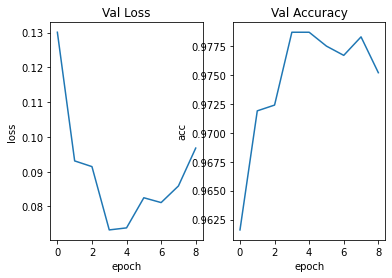

313/313 [==============================] - 0s 706us/step - loss: 0.0719 - accuracy: 0.9783
best test model loss:  0.07191315293312073
best test model accuracy:  0.9782999753952026


In [8]:
# 7
# Early stopping(patience=5), adam optimizer

batchSize = 256
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 0.2916 - accuracy: 0.9419 - val_loss: 0.3417 - val_accuracy: 0.9535
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1566 - accuracy: 0.9803 - val_loss: 0.1854 - val_accuracy: 0.9716
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1282 - accuracy: 0.9867 - val_loss: 0.1921 - val_accuracy: 0.9670
Epoch 4/50
196/196 [==============================] - 2s 9ms/step - loss: 0.1087 - accuracy: 0.9912 - val_loss: 0.1685 - val_accuracy: 0.9750
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0986 - accuracy: 0.9923 - val_loss: 0.1780 - val_accuracy: 0.9703
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 0.1073 - accuracy: 0.9883 - val_loss: 0.1996 - val_accuracy: 0.9675
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 0.0960 - accuracy: 0.9915 - val_loss: 0.1693 - val_accuracy: 0.9730
Epoch 

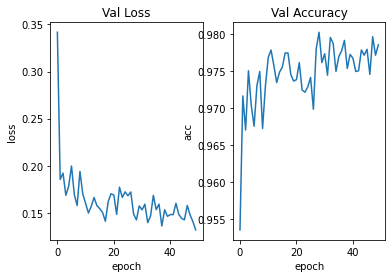

313/313 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 0.9798
test loss: 0.12680353224277496
test accuracy: 0.9797999858856201


In [9]:
# 8
# L2 regularization, batch norm, adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 2.0450 - accuracy: 0.5097 - val_loss: 1.6327 - val_accuracy: 0.7519
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3234 - accuracy: 0.7794 - val_loss: 1.0277 - val_accuracy: 0.8320
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.9190 - accuracy: 0.8338 - val_loss: 0.7665 - val_accuracy: 0.8647
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.7427 - accuracy: 0.8561 - val_loss: 0.6464 - val_accuracy: 0.8769
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.6515 - accuracy: 0.8695 - val_loss: 0.5784 - val_accuracy: 0.8874
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5957 - accuracy: 0.8783 - val_loss: 0.5354 - val_accuracy: 0.8921
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5581 - accuracy: 0.8841 - val_loss: 0.5062 - val_accuracy: 0.8977
Epoch 

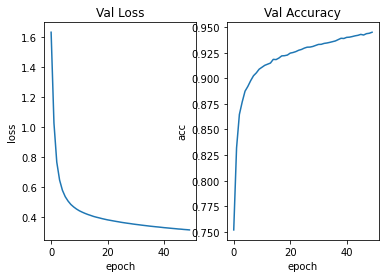

313/313 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.9416
test loss: 0.31944769620895386
test accuracy: 0.9416000247001648


In [10]:
# 9
# L2 regularization, Adagrad optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adagrad(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3328 - accuracy: 0.7342 - val_loss: 0.6906 - val_accuracy: 0.8791
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.6152 - accuracy: 0.8753 - val_loss: 0.4975 - val_accuracy: 0.9018
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.5034 - accuracy: 0.8949 - val_loss: 0.4411 - val_accuracy: 0.9119
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4563 - accuracy: 0.9050 - val_loss: 0.4128 - val_accuracy: 0.9173
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4277 - accuracy: 0.9112 - val_loss: 0.3909 - val_accuracy: 0.9231
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.4071 - accuracy: 0.9171 - val_loss: 0.3759 - val_accuracy: 0.9261
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3904 - accuracy: 0.9223 - val_loss: 0.3630 - val_accuracy: 0.9309
Epoch 

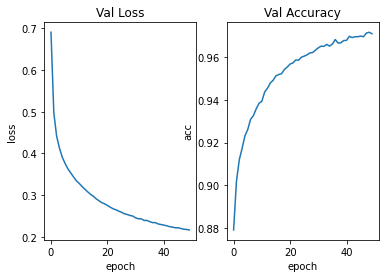

313/313 [==============================] - 0s 974us/step - loss: 0.2136 - accuracy: 0.9697
test loss: 0.2136296182870865
test accuracy: 0.9696999788284302


In [11]:
# 10
# L2 regularization, Stochastic gradient descent optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 4s 8ms/step - loss: 0.3308 - accuracy: 0.9252 - val_loss: 0.2072 - val_accuracy: 0.9628
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.1682 - accuracy: 0.9701 - val_loss: 0.1598 - val_accuracy: 0.9707
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.1290 - accuracy: 0.9786 - val_loss: 0.1520 - val_accuracy: 0.9717
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.1081 - accuracy: 0.9820 - val_loss: 0.1251 - val_accuracy: 0.9768
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.0946 - accuracy: 0.9848 - val_loss: 0.1233 - val_accuracy: 0.9762
Epoch 6/50
391/391 [==============================] - 3s 7ms/step - loss: 0.0844 - accuracy: 0.9864 - val_loss: 0.1352 - val_accuracy: 0.9741
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.0766 - accuracy: 0.9880 - val_loss: 0.1107 - val_accuracy: 0.9805
Epoch 

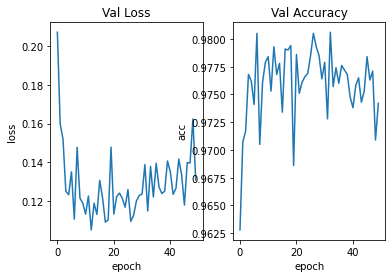

313/313 [==============================] - 0s 1ms/step - loss: 0.1261 - accuracy: 0.9740
test loss: 0.1261495053768158
test accuracy: 0.9739999771118164


In [12]:
# 11
# L2 regularization, RMS prop optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/100
380/391 [============================>.] - ETA: 0s - loss: 0.2403 - accuracy: 0.9294
Epoch 1: val_loss improved from inf to 0.10385, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.2372 - accuracy: 0.9303 - val_loss: 0.1038 - val_accuracy: 0.9700
Epoch 2/100
391/391 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9741
Epoch 2: val_loss improved from 0.10385 to 0.08784, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.0844 - accuracy: 0.9741 - val_loss: 0.0878 - val_accuracy: 0.9732
Epoch 3/100
383/391 [============================>.] - ETA: 0s - loss: 0.0509 - accuracy: 0.9838
Epoch 3: val_loss improved from 0.08784 to 0.07591, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0759 - val_accuracy: 0.9770
Epoch 4/100
380/391 [============================>.] - ETA: 0s - loss: 0.0

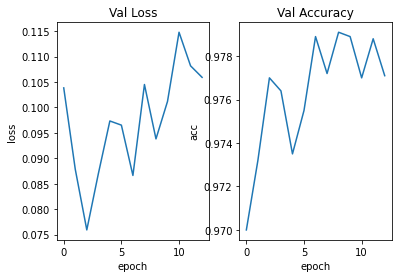

313/313 [==============================] - 0s 706us/step - loss: 0.0756 - accuracy: 0.9768
best test model loss:  0.07558868080377579
best test model accuracy:  0.9768000245094299


In [13]:
# 12
# Early stopping(patience=10), adam optimizer

batchSize = 128
epoch = 100

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/100
383/391 [============================>.] - ETA: 0s - loss: 0.3380 - accuracy: 0.9271
Epoch 1: val_loss improved from inf to 0.21312, saving model to best_model.h5
391/391 [==============================] - 3s 6ms/step - loss: 0.3352 - accuracy: 0.9280 - val_loss: 0.2131 - val_accuracy: 0.9625
Epoch 2/100
384/391 [============================>.] - ETA: 0s - loss: 0.1750 - accuracy: 0.9718
Epoch 2: val_loss improved from 0.21312 to 0.16324, saving model to best_model.h5
391/391 [==============================] - 2s 5ms/step - loss: 0.1746 - accuracy: 0.9719 - val_loss: 0.1632 - val_accuracy: 0.9730
Epoch 3/100
389/391 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9798
Epoch 3: val_loss did not improve from 0.16324
391/391 [==============================] - 2s 5ms/step - loss: 0.1401 - accuracy: 0.9798 - val_loss: 0.1637 - val_accuracy: 0.9730
Epoch 4/100
391/391 [==============================] - ETA: 0s - loss: 0.1211 - accuracy: 0.9841
Epoch 4: val

386/391 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9945
Epoch 29: val_loss did not improve from 0.10955
391/391 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9946 - val_loss: 0.1148 - val_accuracy: 0.9804
Epoch 30/100
383/391 [============================>.] - ETA: 0s - loss: 0.0468 - accuracy: 0.9960
Epoch 30: val_loss did not improve from 0.10955
391/391 [==============================] - 2s 5ms/step - loss: 0.0470 - accuracy: 0.9961 - val_loss: 0.1127 - val_accuracy: 0.9785
Epoch 31/100
381/391 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9956
Epoch 31: val_loss did not improve from 0.10955
391/391 [==============================] - 2s 5ms/step - loss: 0.0487 - accuracy: 0.9955 - val_loss: 0.1137 - val_accuracy: 0.9788
Epoch 32/100
382/391 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9958
Epoch 32: val_loss did not improve from 0.10955
391/391 [===========================

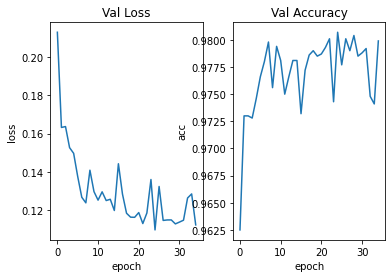

313/313 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9810
best test model loss:  0.10839344561100006
best test model accuracy:  0.9810000061988831


In [14]:
# 13
# Early stopping(patience=10), L2 regularization, adam optimizer

batchSize = 128
epoch = 100

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512,  kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512,  kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/1000
381/391 [============================>.] - ETA: 0s - loss: 0.3370 - accuracy: 0.9272
Epoch 1: val_loss improved from inf to 0.19418, saving model to best_model.h5
391/391 [==============================] - 3s 6ms/step - loss: 0.3339 - accuracy: 0.9281 - val_loss: 0.1942 - val_accuracy: 0.9690
Epoch 2/1000
383/391 [============================>.] - ETA: 0s - loss: 0.1706 - accuracy: 0.9726
Epoch 2: val_loss improved from 0.19418 to 0.17264, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.1705 - accuracy: 0.9727 - val_loss: 0.1726 - val_accuracy: 0.9716
Epoch 3/1000
382/391 [============================>.] - ETA: 0s - loss: 0.1364 - accuracy: 0.9811
Epoch 3: val_loss improved from 0.17264 to 0.14958, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.1365 - accuracy: 0.9811 - val_loss: 0.1496 - val_accuracy: 0.9762
Epoch 4/1000
381/391 [============================>.] - ETA: 0s - loss:

Epoch 29/1000
390/391 [============================>.] - ETA: 0s - loss: 0.0500 - accuracy: 0.9951
Epoch 29: val_loss did not improve from 0.11577
391/391 [==============================] - 2s 5ms/step - loss: 0.0500 - accuracy: 0.9951 - val_loss: 0.1216 - val_accuracy: 0.9769
Epoch 30/1000
385/391 [============================>.] - ETA: 0s - loss: 0.0455 - accuracy: 0.9963
Epoch 30: val_loss improved from 0.11577 to 0.11028, saving model to best_model.h5
391/391 [==============================] - 2s 6ms/step - loss: 0.0455 - accuracy: 0.9963 - val_loss: 0.1103 - val_accuracy: 0.9785
Epoch 31/1000
383/391 [============================>.] - ETA: 0s - loss: 0.0461 - accuracy: 0.9959
Epoch 31: val_loss did not improve from 0.11028
391/391 [==============================] - 2s 5ms/step - loss: 0.0461 - accuracy: 0.9958 - val_loss: 0.1220 - val_accuracy: 0.9768
Epoch 32/1000
382/391 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9960
Epoch 32: val_loss improved from

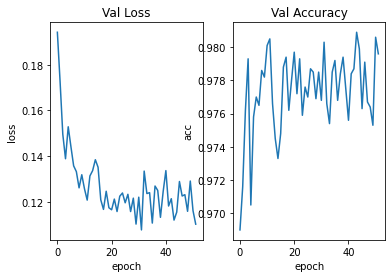

313/313 [==============================] - 0s 969us/step - loss: 0.1019 - accuracy: 0.9826
best test model loss:  0.10191342234611511
best test model accuracy:  0.9825999736785889


In [15]:
# 14
# Early stopping(patience=20), L2 regularization, adam optimizer

batchSize = 128
epoch = 1000

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.3379 - accuracy: 0.9170 - val_loss: 0.1892 - val_accuracy: 0.9585
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.1701 - accuracy: 0.9629 - val_loss: 0.1455 - val_accuracy: 0.9715
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.1297 - accuracy: 0.9752 - val_loss: 0.1352 - val_accuracy: 0.9737
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.1081 - accuracy: 0.9815 - val_loss: 0.1271 - val_accuracy: 0.9746
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0964 - accuracy: 0.9840 - val_loss: 0.1187 - val_accuracy: 0.9763
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9876 - val_loss: 0.1111 - val_accuracy: 0.9795
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0792 - accuracy: 0.9889 - val_loss: 0.1105 - val_accuracy: 0.9774
Epoch 

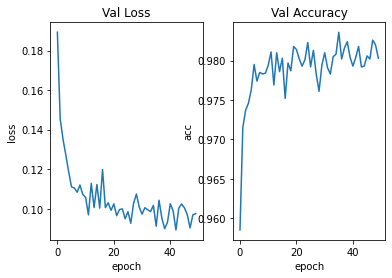

313/313 [==============================] - 0s 786us/step - loss: 0.0898 - accuracy: 0.9804
test loss: 0.08976899087429047
test accuracy: 0.980400025844574


In [16]:
# 1
# L2 regularization, Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.9090 - val_loss: 0.1468 - val_accuracy: 0.9599
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.1389 - accuracy: 0.9596 - val_loss: 0.1049 - val_accuracy: 0.9693
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9726 - val_loss: 0.0878 - val_accuracy: 0.9730
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9784 - val_loss: 0.0760 - val_accuracy: 0.9765
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.9842 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9863 - val_loss: 0.0715 - val_accuracy: 0.9781
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.0685 - val_accuracy: 0.9799
Epoch 

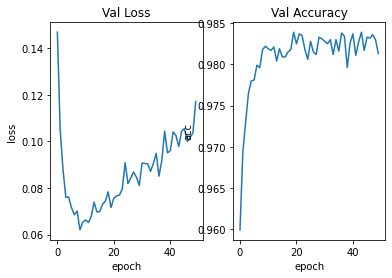

313/313 [==============================] - 0s 646us/step - loss: 0.1022 - accuracy: 0.9823
test loss: 0.10223206877708435
test accuracy: 0.9822999835014343


In [17]:
# 2
# Dropout regularization(0.2), Adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
377/391 [===========================>..] - ETA: 0s - loss: 0.2993 - accuracy: 0.9143
Epoch 1: val_loss improved from inf to 0.14229, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.2942 - accuracy: 0.9157 - val_loss: 0.1423 - val_accuracy: 0.9598
Epoch 2/50
375/391 [===========================>..] - ETA: 0s - loss: 0.1246 - accuracy: 0.9640
Epoch 2: val_loss improved from 0.14229 to 0.10515, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.9645 - val_loss: 0.1051 - val_accuracy: 0.9701
Epoch 3/50
375/391 [===========================>..] - ETA: 0s - loss: 0.0808 - accuracy: 0.9765
Epoch 3: val_loss improved from 0.10515 to 0.09421, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.0800 - accuracy: 0.9767 - val_loss: 0.0942 - val_accuracy: 0.9726
Epoch 4/50
374/391 [===========================>..] - ETA: 0s - loss: 0.0578 

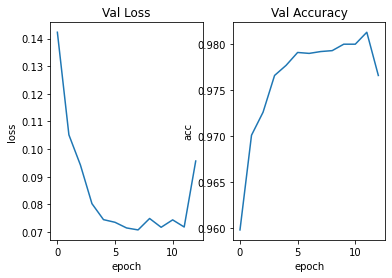

313/313 [==============================] - 0s 671us/step - loss: 0.0649 - accuracy: 0.9804
best test model loss:  0.06488464027643204
best test model accuracy:  0.980400025844574


In [18]:
# 3
# Early stopping(patience=5), adam optimizer

batchSize = 128
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.2526 - accuracy: 0.9385 - val_loss: 0.1734 - val_accuracy: 0.9658
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.1189 - accuracy: 0.9772 - val_loss: 0.1389 - val_accuracy: 0.9717
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.9844 - val_loss: 0.1198 - val_accuracy: 0.9747
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0755 - accuracy: 0.9890 - val_loss: 0.1233 - val_accuracy: 0.9739
Epoch 5/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9911 - val_loss: 0.1164 - val_accuracy: 0.9760
Epoch 6/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9913 - val_loss: 0.1320 - val_accuracy: 0.9711
Epoch 7/50
391/391 [==============================] - 2s 4ms/step - loss: 0.0651 - accuracy: 0.9908 - val_loss: 0.1269 - val_accuracy: 0.9748
Epoch 

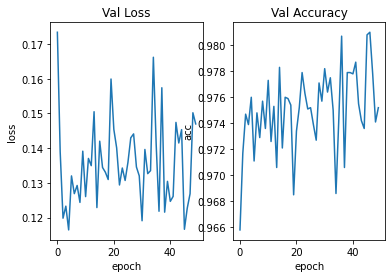

313/313 [==============================] - 0s 933us/step - loss: 0.1415 - accuracy: 0.9739
test loss: 0.14152467250823975
test accuracy: 0.9739000201225281


In [19]:
# 4
# L2 regularization, batch norm, adam optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 1s 5ms/step - loss: 0.4007 - accuracy: 0.9011 - val_loss: 0.2209 - val_accuracy: 0.9491
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 0.2001 - accuracy: 0.9549 - val_loss: 0.1685 - val_accuracy: 0.9655
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1529 - accuracy: 0.9683 - val_loss: 0.1462 - val_accuracy: 0.9703
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1254 - accuracy: 0.9765 - val_loss: 0.1328 - val_accuracy: 0.9733
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1089 - accuracy: 0.9815 - val_loss: 0.1258 - val_accuracy: 0.9739
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0959 - accuracy: 0.9843 - val_loss: 0.1184 - val_accuracy: 0.9762
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 0.0861 - accuracy: 0.9873 - val_loss: 0.1127 - val_accuracy: 0.9777
Epoch 

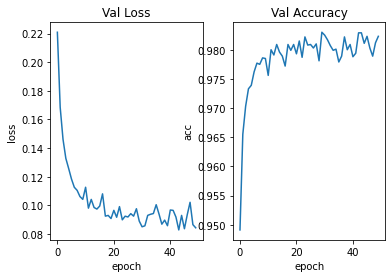

313/313 [==============================] - 0s 792us/step - loss: 0.0805 - accuracy: 0.9818
test loss: 0.08046035468578339
test accuracy: 0.9818000197410583


In [20]:
# 5
# L2 regularization, Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time:', time.time() - start)

print('train loss:', model_fit.history['loss'][-1])
print('train accuracy:', model_fit.history['accuracy'][-1])

print('dev loss:', model_fit.history['val_loss'][-1])
print('dev accuracy:', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
196/196 [==============================] - 1s 5ms/step - loss: 0.3797 - accuracy: 0.8926 - val_loss: 0.1801 - val_accuracy: 0.9531
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1680 - accuracy: 0.9519 - val_loss: 0.1288 - val_accuracy: 0.9637
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 0.1180 - accuracy: 0.9656 - val_loss: 0.1102 - val_accuracy: 0.9702
Epoch 4/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0922 - accuracy: 0.9733 - val_loss: 0.0895 - val_accuracy: 0.9740
Epoch 5/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0733 - accuracy: 0.9792 - val_loss: 0.0831 - val_accuracy: 0.9765
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0604 - accuracy: 0.9828 - val_loss: 0.0775 - val_accuracy: 0.9770
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0511 - accuracy: 0.9854 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 

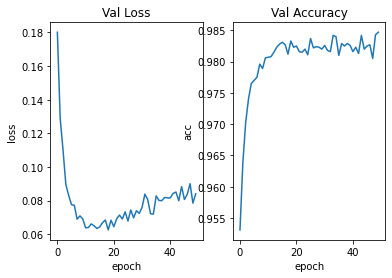

313/313 [==============================] - 0s 658us/step - loss: 0.0778 - accuracy: 0.9845
test loss: 0.077786386013031
test accuracy: 0.984499990940094


In [21]:
# 6
# Dropout regularization(0.2), Adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
190/196 [============================>.] - ETA: 0s - loss: 0.3614 - accuracy: 0.9015
Epoch 1: val_loss improved from inf to 0.18210, saving model to best_model.h5
196/196 [==============================] - 1s 5ms/step - loss: 0.3571 - accuracy: 0.9026 - val_loss: 0.1821 - val_accuracy: 0.9492
Epoch 2/50
190/196 [============================>.] - ETA: 0s - loss: 0.1526 - accuracy: 0.9563
Epoch 2: val_loss improved from 0.18210 to 0.12962, saving model to best_model.h5
196/196 [==============================] - 1s 5ms/step - loss: 0.1520 - accuracy: 0.9565 - val_loss: 0.1296 - val_accuracy: 0.9637
Epoch 3/50
188/196 [===========================>..] - ETA: 0s - loss: 0.1043 - accuracy: 0.9704
Epoch 3: val_loss improved from 0.12962 to 0.10566, saving model to best_model.h5
196/196 [==============================] - 1s 5ms/step - loss: 0.1048 - accuracy: 0.9701 - val_loss: 0.1057 - val_accuracy: 0.9686
Epoch 4/50
190/196 [============================>.] - ETA: 0s - loss: 0.0767 

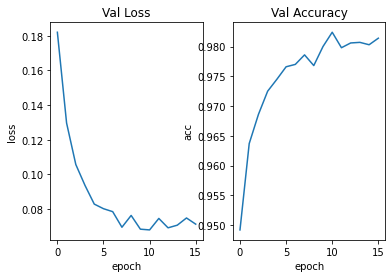

313/313 [==============================] - 0s 656us/step - loss: 0.0622 - accuracy: 0.9816
best test model loss:  0.06223904341459274
best test model accuracy:  0.9815999865531921


In [22]:
# 7
# Early stopping(patience=5), adam optimizer

batchSize = 256
epoch = 50

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 0.2782 - accuracy: 0.9312 - val_loss: 0.3562 - val_accuracy: 0.9567
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 0.1223 - accuracy: 0.9767 - val_loss: 0.1563 - val_accuracy: 0.9687
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0864 - accuracy: 0.9871 - val_loss: 0.1230 - val_accuracy: 0.9735
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0676 - accuracy: 0.9918 - val_loss: 0.1184 - val_accuracy: 0.9739
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0564 - accuracy: 0.9942 - val_loss: 0.1164 - val_accuracy: 0.9751
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0481 - accuracy: 0.9963 - val_loss: 0.1096 - val_accuracy: 0.9757
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0431 - accuracy: 0.9970 - val_loss: 0.1030 - val_accuracy: 0.9786
Epoch 

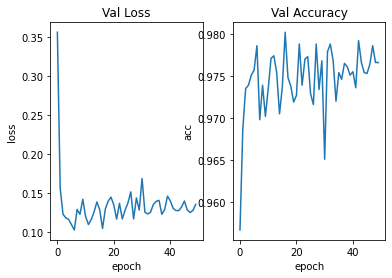

313/313 [==============================] - 0s 912us/step - loss: 0.1333 - accuracy: 0.9745
test loss: 0.13325294852256775
test accuracy: 0.9745000004768372


In [23]:
# 8
# L2 regularization, batch norm, adam optimizer

batchSize = 256
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 1.8503 - accuracy: 0.5617 - val_loss: 1.3965 - val_accuracy: 0.7767
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1926 - accuracy: 0.7835 - val_loss: 0.9726 - val_accuracy: 0.8330
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.9104 - accuracy: 0.8254 - val_loss: 0.7779 - val_accuracy: 0.8577
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.7685 - accuracy: 0.8449 - val_loss: 0.6718 - val_accuracy: 0.8703
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.6843 - accuracy: 0.8575 - val_loss: 0.6052 - val_accuracy: 0.8805
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.6282 - accuracy: 0.8656 - val_loss: 0.5600 - val_accuracy: 0.8862
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.5881 - accuracy: 0.8724 - val_loss: 0.5268 - val_accuracy: 0.8912
Epoch 

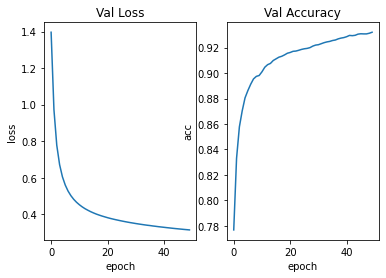

313/313 [==============================] - 0s 857us/step - loss: 0.3193 - accuracy: 0.9306
test loss: 0.31929901242256165
test accuracy: 0.9305999875068665


In [24]:
# 9
# L2 regularization, Adagrad optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adagrad(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 3ms/step - loss: 1.2666 - accuracy: 0.7324 - val_loss: 0.7179 - val_accuracy: 0.8673
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.6396 - accuracy: 0.8658 - val_loss: 0.5161 - val_accuracy: 0.8928
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 0.5181 - accuracy: 0.8839 - val_loss: 0.4469 - val_accuracy: 0.9040
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 0.4645 - accuracy: 0.8936 - val_loss: 0.4110 - val_accuracy: 0.9102
Epoch 5/50
391/391 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8997 - val_loss: 0.3884 - val_accuracy: 0.9141
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.9046 - val_loss: 0.3729 - val_accuracy: 0.9169
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.9097 - val_loss: 0.3598 - val_accuracy: 0.9198
Epoch 

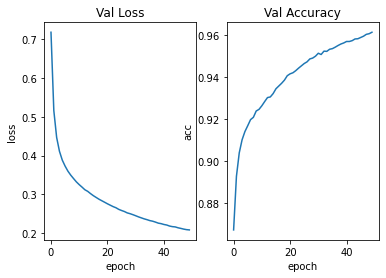

313/313 [==============================] - 0s 850us/step - loss: 0.2090 - accuracy: 0.9558
test loss: 0.20904453098773956
test accuracy: 0.9557999968528748


In [25]:
# 10
# L2 regularization, Stochastic gradient descent optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3275 - accuracy: 0.9184 - val_loss: 0.1788 - val_accuracy: 0.9619
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1636 - accuracy: 0.9632 - val_loss: 0.1550 - val_accuracy: 0.9664
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1251 - accuracy: 0.9745 - val_loss: 0.1272 - val_accuracy: 0.9746
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 0.1048 - accuracy: 0.9807 - val_loss: 0.1205 - val_accuracy: 0.9746
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0915 - accuracy: 0.9838 - val_loss: 0.1216 - val_accuracy: 0.9736
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0829 - accuracy: 0.9857 - val_loss: 0.1088 - val_accuracy: 0.9783
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.0761 - accuracy: 0.9873 - val_loss: 0.1261 - val_accuracy: 0.9716
Epoch 

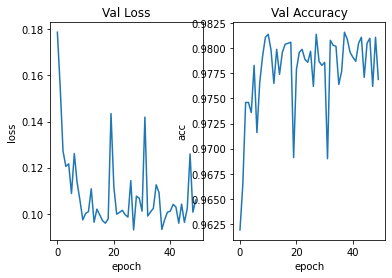

313/313 [==============================] - 0s 870us/step - loss: 0.1029 - accuracy: 0.9775
test loss: 0.10286113619804382
test accuracy: 0.9775000214576721


In [26]:
# 11
# L2 regularization, RMS prop optimizer

batchSize = 128
epoch = 50

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev))

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Epoch 1/100
384/391 [============================>.] - ETA: 0s - loss: 0.2943 - accuracy: 0.9185
Epoch 1: val_loss improved from inf to 0.15067, saving model to best_model.h5
391/391 [==============================] - 2s 3ms/step - loss: 0.2923 - accuracy: 0.9191 - val_loss: 0.1507 - val_accuracy: 0.9559
Epoch 2/100
388/391 [============================>.] - ETA: 0s - loss: 0.1208 - accuracy: 0.9651
Epoch 2: val_loss improved from 0.15067 to 0.10332, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 0.9652 - val_loss: 0.1033 - val_accuracy: 0.9705
Epoch 3/100
389/391 [============================>.] - ETA: 0s - loss: 0.0780 - accuracy: 0.9776
Epoch 3: val_loss improved from 0.10332 to 0.08947, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.0780 - accuracy: 0.9776 - val_loss: 0.0895 - val_accuracy: 0.9728
Epoch 4/100
386/391 [============================>.] - ETA: 0s - loss: 0.0

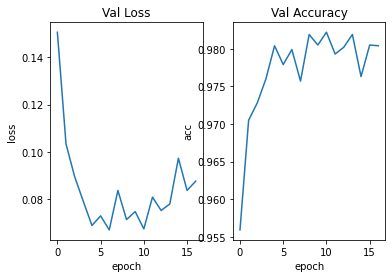

313/313 [==============================] - 0s 668us/step - loss: 0.0605 - accuracy: 0.9808
best test model loss:  0.060482099652290344
best test model accuracy:  0.9807999730110168


In [27]:
# 12
# Early stopping(patience=10), adam optimizer

batchSize = 128
epoch = 100

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/100
389/391 [============================>.] - ETA: 0s - loss: 0.3357 - accuracy: 0.9183
Epoch 1: val_loss improved from inf to 0.20019, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.3350 - accuracy: 0.9185 - val_loss: 0.2002 - val_accuracy: 0.9570
Epoch 2/100
374/391 [===========================>..] - ETA: 0s - loss: 0.1695 - accuracy: 0.9631
Epoch 2: val_loss improved from 0.20019 to 0.15212, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.1680 - accuracy: 0.9636 - val_loss: 0.1521 - val_accuracy: 0.9678
Epoch 3/100
384/391 [============================>.] - ETA: 0s - loss: 0.1294 - accuracy: 0.9753
Epoch 3: val_loss improved from 0.15212 to 0.13117, saving model to best_model.h5
391/391 [==============================] - 1s 4ms/step - loss: 0.1293 - accuracy: 0.9754 - val_loss: 0.1312 - val_accuracy: 0.9748
Epoch 4/100
388/391 [============================>.] - ETA: 0s - loss: 0.1

390/391 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9963
Epoch 29: val_loss improved from 0.09794 to 0.09684, saving model to best_model.h5
391/391 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9963 - val_loss: 0.0968 - val_accuracy: 0.9807
Epoch 30/100
377/391 [===========================>..] - ETA: 0s - loss: 0.0429 - accuracy: 0.9965
Epoch 30: val_loss did not improve from 0.09684
391/391 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9964 - val_loss: 0.1020 - val_accuracy: 0.9797
Epoch 31/100
377/391 [===========================>..] - ETA: 0s - loss: 0.0454 - accuracy: 0.9953
Epoch 31: val_loss did not improve from 0.09684
391/391 [==============================] - 1s 4ms/step - loss: 0.0454 - accuracy: 0.9954 - val_loss: 0.1041 - val_accuracy: 0.9790
Epoch 32/100
376/391 [===========================>..] - ETA: 0s - loss: 0.0412 - accuracy: 0.9969
Epoch 32: val_loss did not improve from 0.09684
3

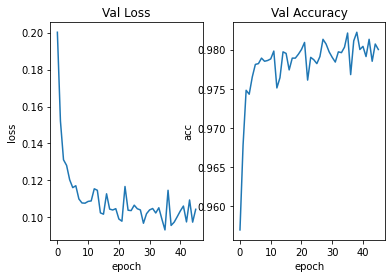

313/313 [==============================] - 0s 847us/step - loss: 0.0853 - accuracy: 0.9824
best test model loss:  0.08528272807598114
best test model accuracy:  0.9824000000953674


In [28]:
# 13
# Early stopping(patience=10), L2 regularization, adam optimizer

batchSize = 128
epoch = 100

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512,  kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)

Epoch 1/1000
389/391 [============================>.] - ETA: 0s - loss: 0.3418 - accuracy: 0.9171
Epoch 1: val_loss improved from inf to 0.19227, saving model to best_model.h5
391/391 [==============================] - 2s 4ms/step - loss: 0.3411 - accuracy: 0.9172 - val_loss: 0.1923 - val_accuracy: 0.9599
Epoch 2/1000
382/391 [============================>.] - ETA: 0s - loss: 0.1699 - accuracy: 0.9640
Epoch 2: val_loss improved from 0.19227 to 0.14815, saving model to best_model.h5
391/391 [==============================] - 1s 4ms/step - loss: 0.1698 - accuracy: 0.9640 - val_loss: 0.1481 - val_accuracy: 0.9696
Epoch 3/1000
389/391 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9749
Epoch 3: val_loss improved from 0.14815 to 0.12720, saving model to best_model.h5
391/391 [==============================] - 1s 3ms/step - loss: 0.1301 - accuracy: 0.9749 - val_loss: 0.1272 - val_accuracy: 0.9744
Epoch 4/1000
386/391 [============================>.] - ETA: 0s - loss:

Epoch 29/1000
386/391 [============================>.] - ETA: 0s - loss: 0.0452 - accuracy: 0.9959
Epoch 29: val_loss did not improve from 0.09489
391/391 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9959 - val_loss: 0.1006 - val_accuracy: 0.9790
Epoch 30/1000
383/391 [============================>.] - ETA: 0s - loss: 0.0457 - accuracy: 0.9954
Epoch 30: val_loss did not improve from 0.09489
391/391 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9954 - val_loss: 0.0980 - val_accuracy: 0.9809
Epoch 31/1000
390/391 [============================>.] - ETA: 0s - loss: 0.0407 - accuracy: 0.9969
Epoch 31: val_loss improved from 0.09489 to 0.09104, saving model to best_model.h5
391/391 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9969 - val_loss: 0.0910 - val_accuracy: 0.9810
Epoch 32/1000
385/391 [============================>.] - ETA: 0s - loss: 0.0429 - accuracy: 0.9959
Epoch 32: val_loss did not impro

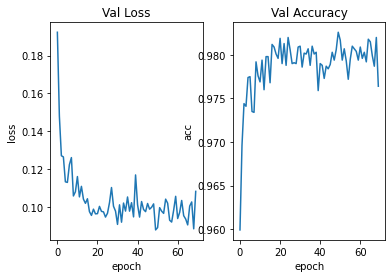

313/313 [==============================] - 0s 882us/step - loss: 0.0881 - accuracy: 0.9834
best test model loss:  0.08810865134000778
best test model accuracy:  0.9833999872207642


In [29]:
# 14
# Early stopping(patience=20), L2 regularization, adam optimizer

batchSize = 128
epoch = 1000

early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# DEFINE MODEL
# 512 relu
# 10 softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(512, kernel_regularizer=tf.keras.regularizers.l2(0.0001), activation=tf.nn.relu),
    
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# COMPILE
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()

# TRAIN
# early stopping
model_fit = model.fit(x_train, y_train,
                      batch_size=batchSize, epochs=epoch, verbose=1,
                      validation_data=(x_dev, y_dev), callbacks=[early_stopping, model_checkpoint])

print('training time: ', time.time() - start)

print('train loss: ', model_fit.history['loss'][-1])
print('train accuracy: ', model_fit.history['accuracy'][-1])

print('dev loss: ', model_fit.history['val_loss'][-1])
print('dev accuracy: ', model_fit.history['val_accuracy'][-1])

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['val_accuracy'])
plt.title('Val Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

best_model = keras.models.load_model('best_model.h5')
best_test_loss, best_test_acc = best_model.evaluate(x_test, y_test)
print('best test model loss: ', best_test_loss)
print('best test model accuracy: ', best_test_acc)